In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
train = pd.read_csv('/Users/kai/Allstate/train.csv')
test = pd.read_csv('/Users/kai/Allstate/test.csv')

In [7]:
#train.isnull().sum()
train = train.drop('id', axis=1)

In [8]:
test_id = test['id']

In [9]:
test = test.drop('id', axis=1)

In [6]:
test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,A,B,A,A,A,A,A,A,B,A,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,A,B,A,B,A,A,A,A,B,A,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,A,B,A,B,B,A,B,A,B,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,A,A,A,A,B,A,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,B,A,A,A,A,B,A,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [7]:
# 1. feature anonymous
# 2. feature all encoded
# 你觉得这里就没有feature engineering可以做了吗？
# 错！最简单的例子是new_feature1 = cont5 +-*/ cont6； YOU NEVER KNOW!

In [10]:
cat_col = [i for i in train.columns if 'cat' in i]
con_col = [i for i in train.columns if 'con' in i]

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


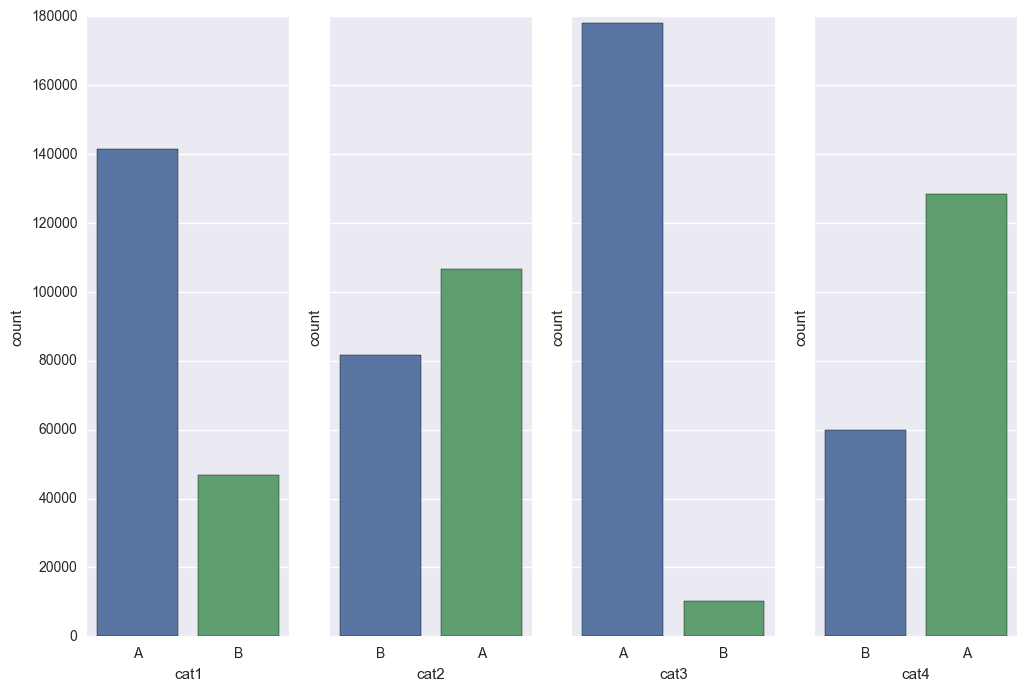

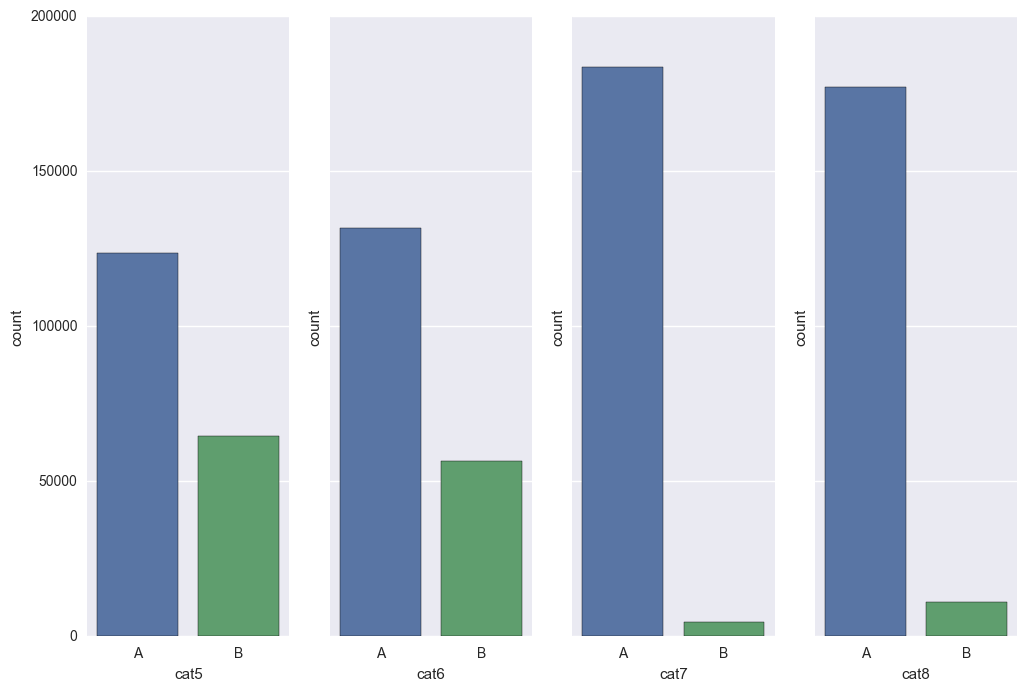

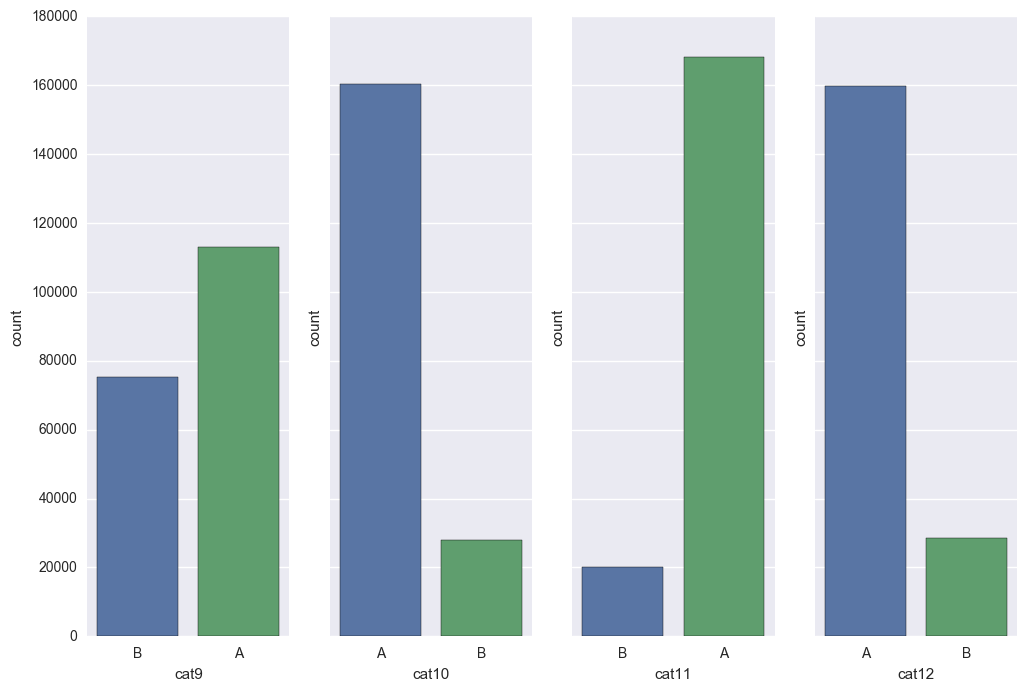

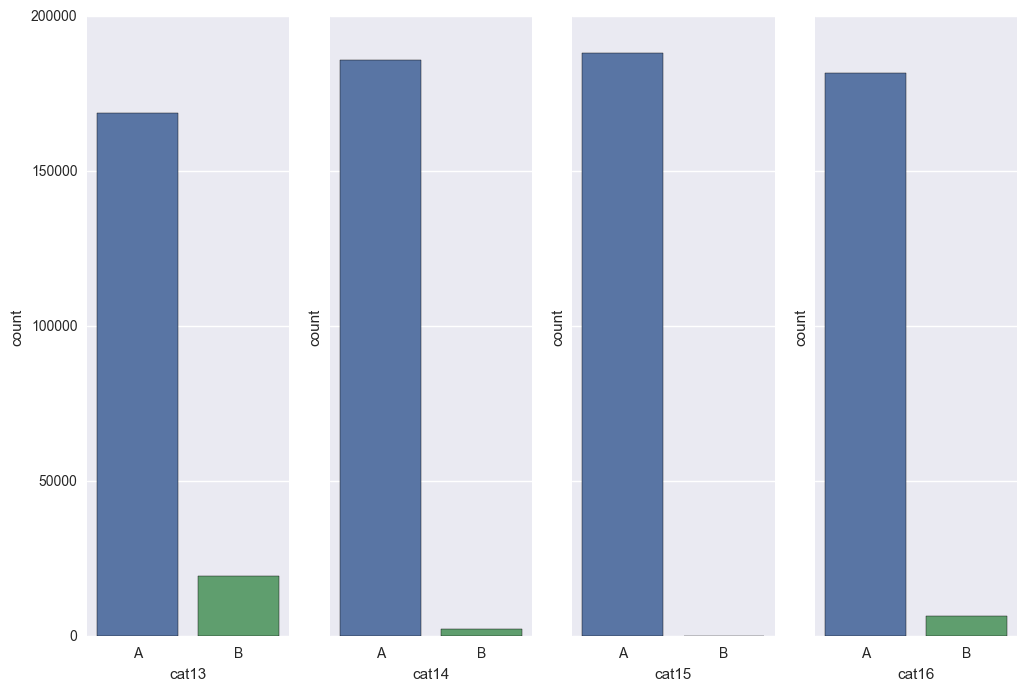

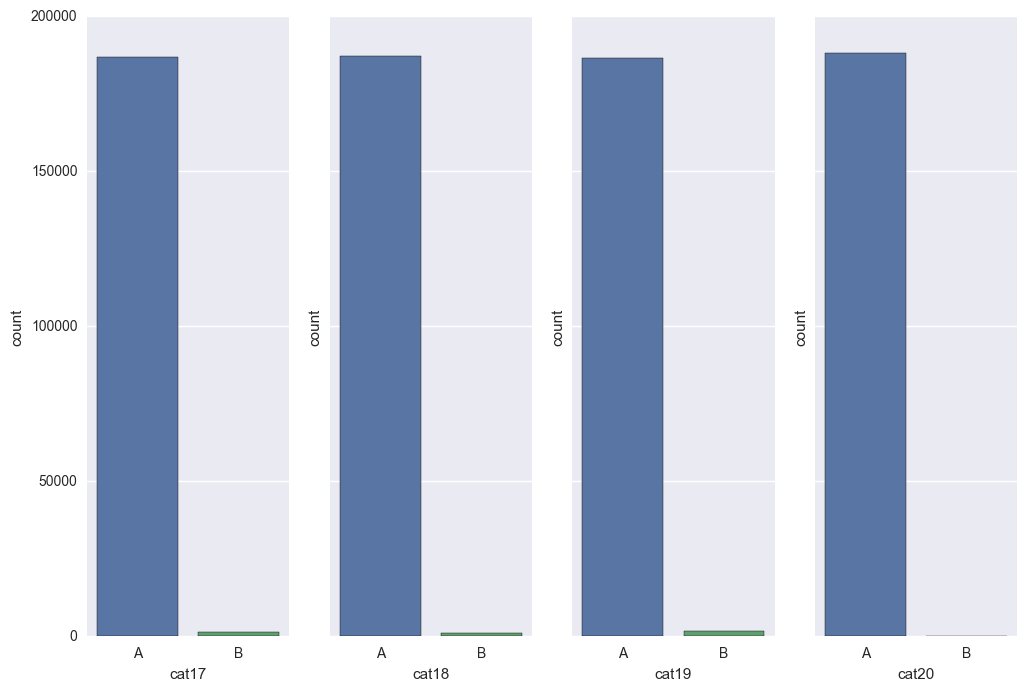

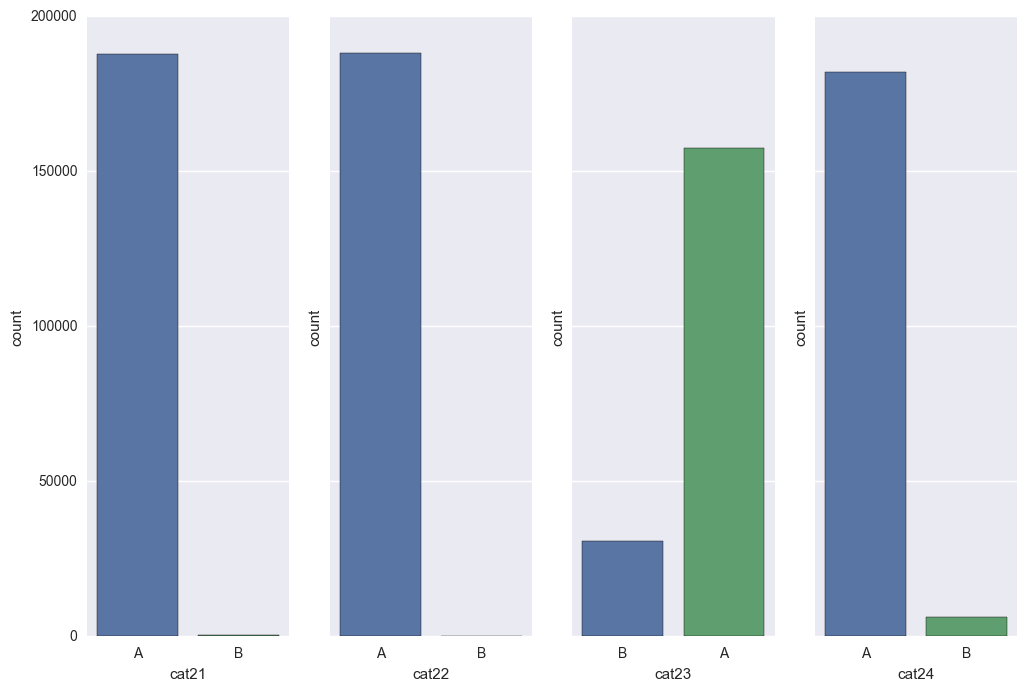

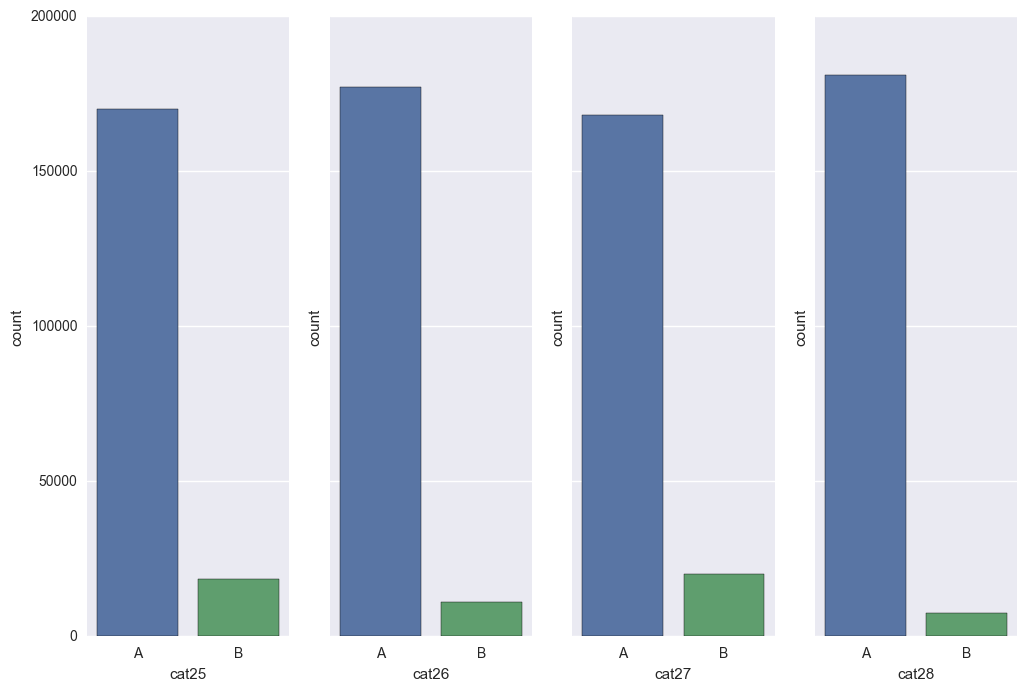

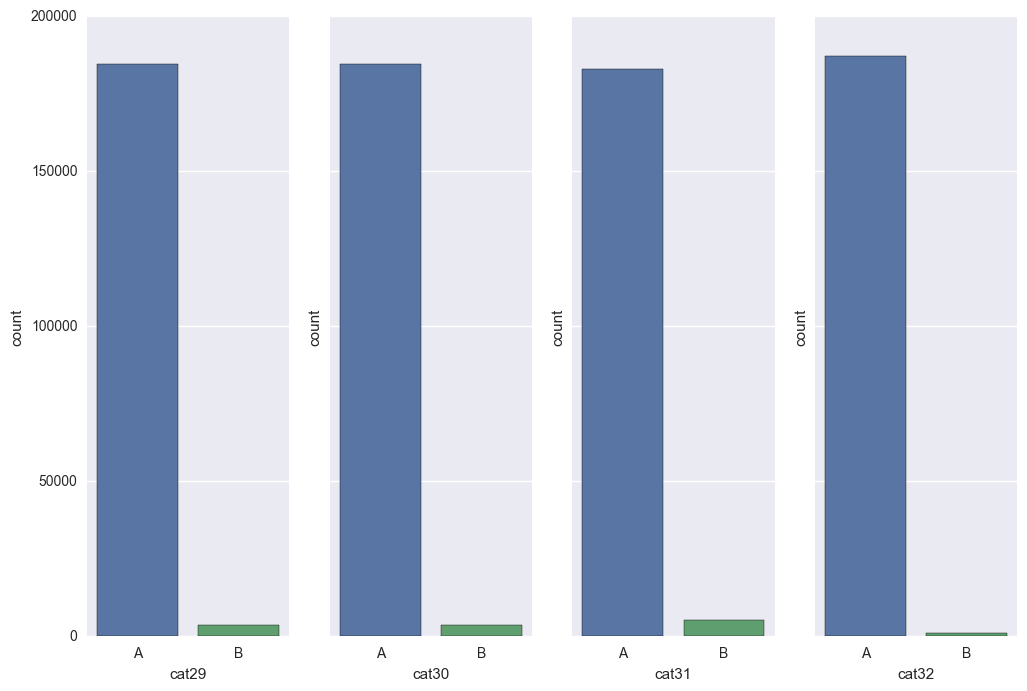

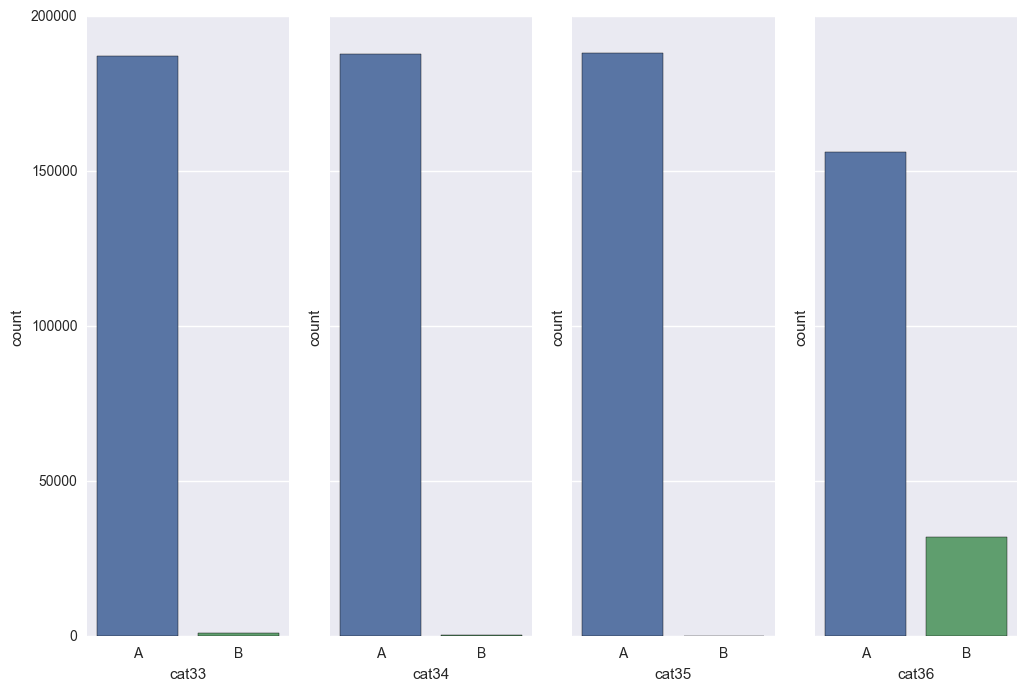

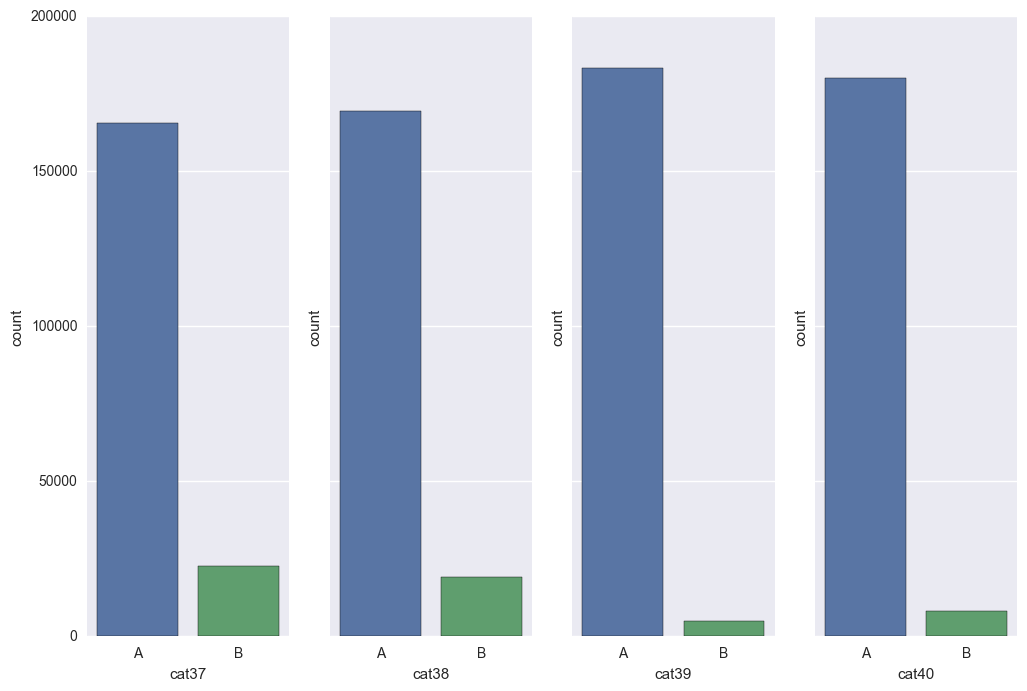

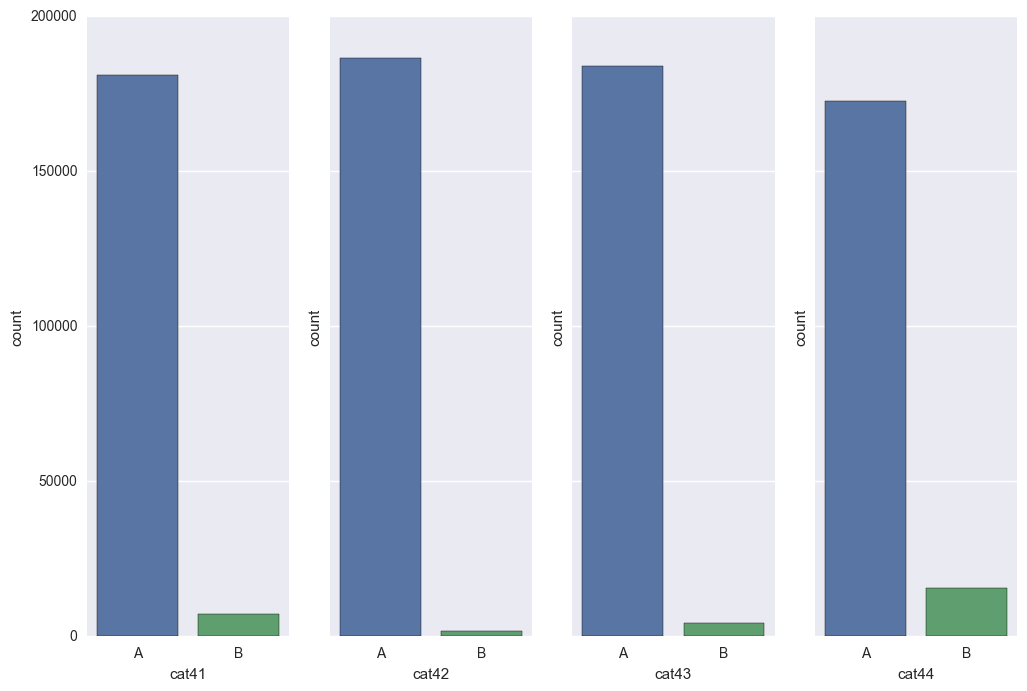

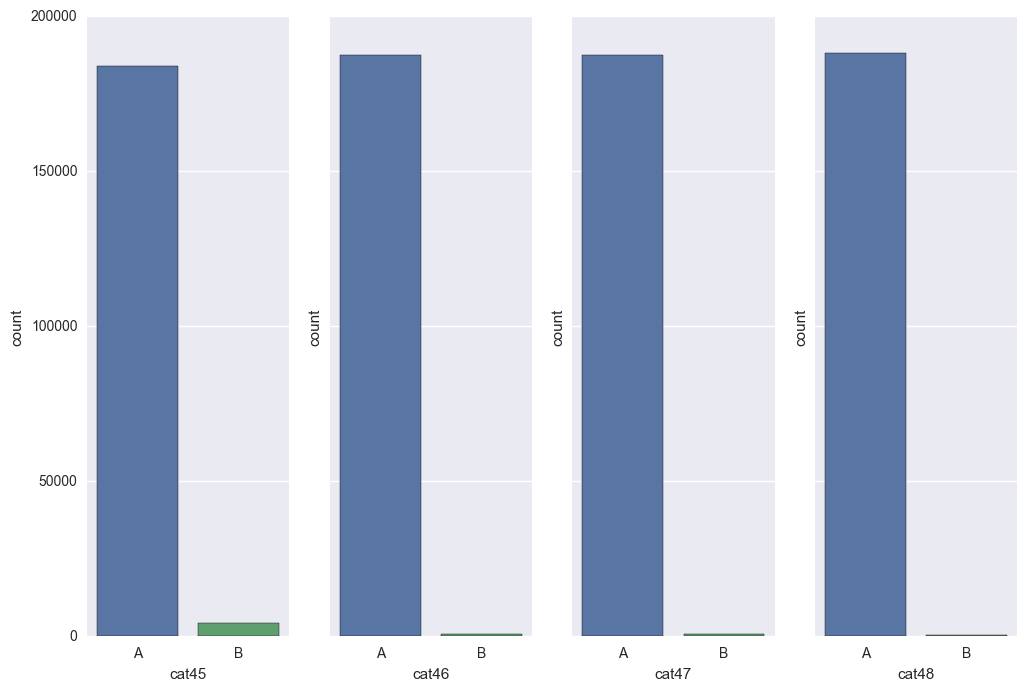

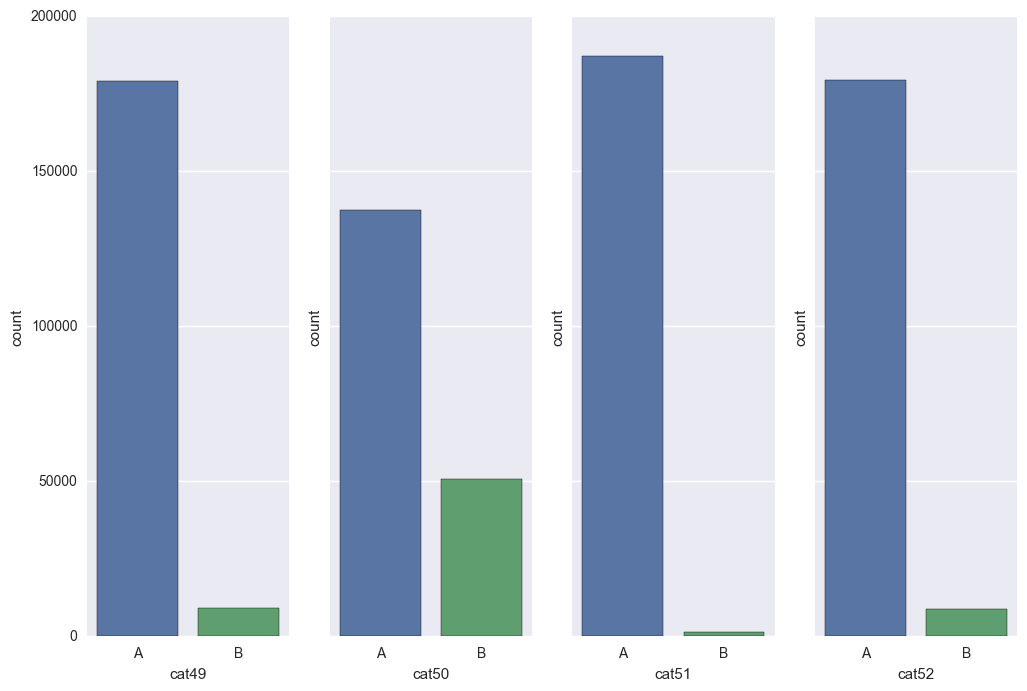

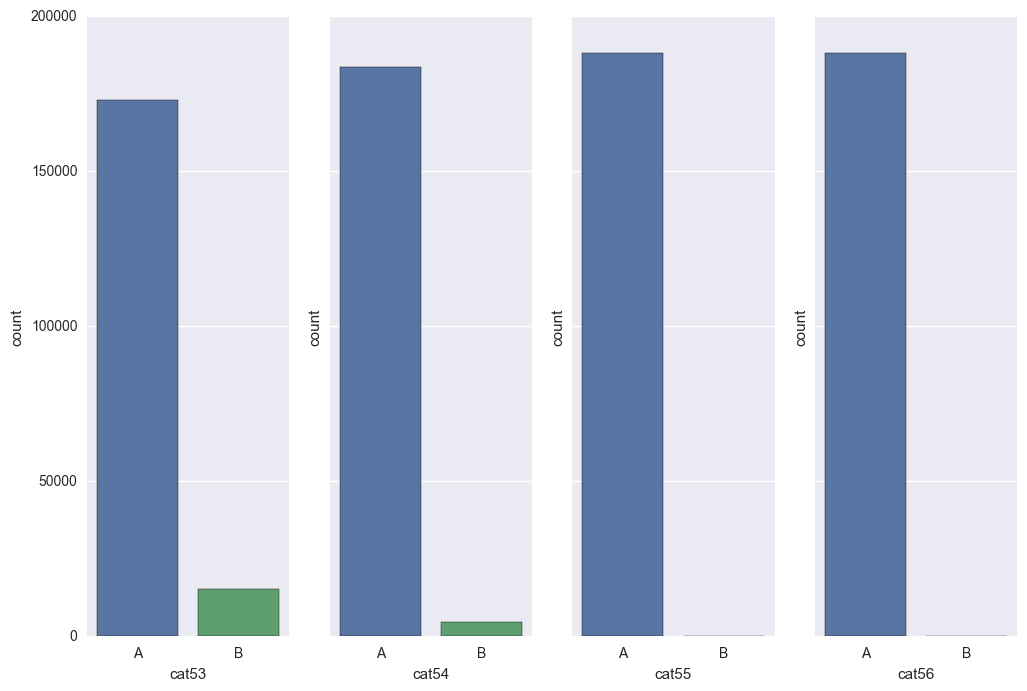

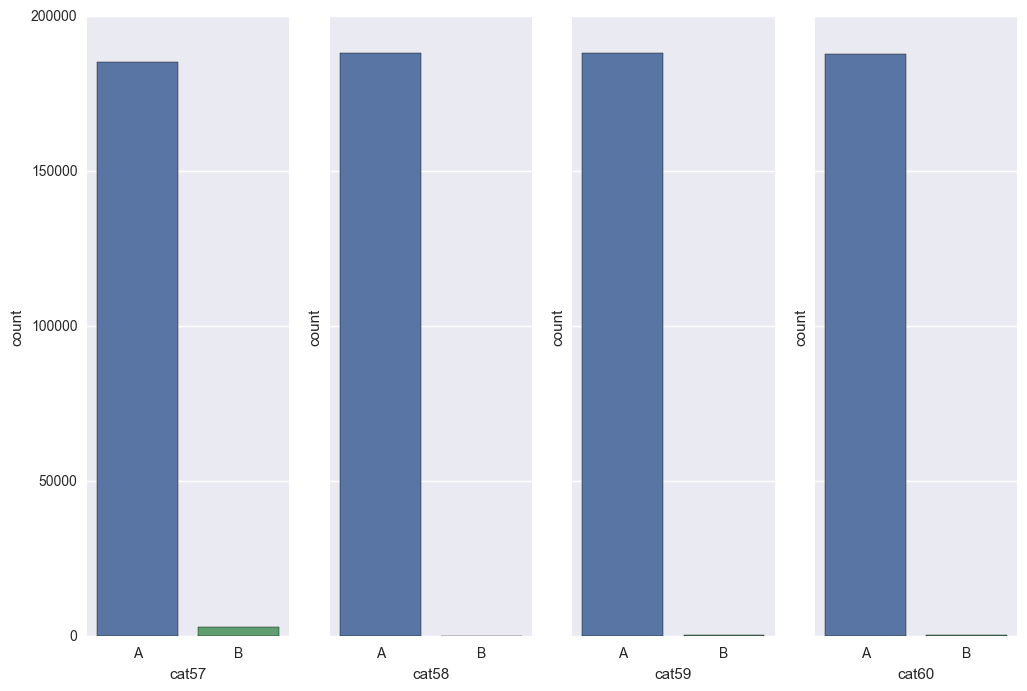

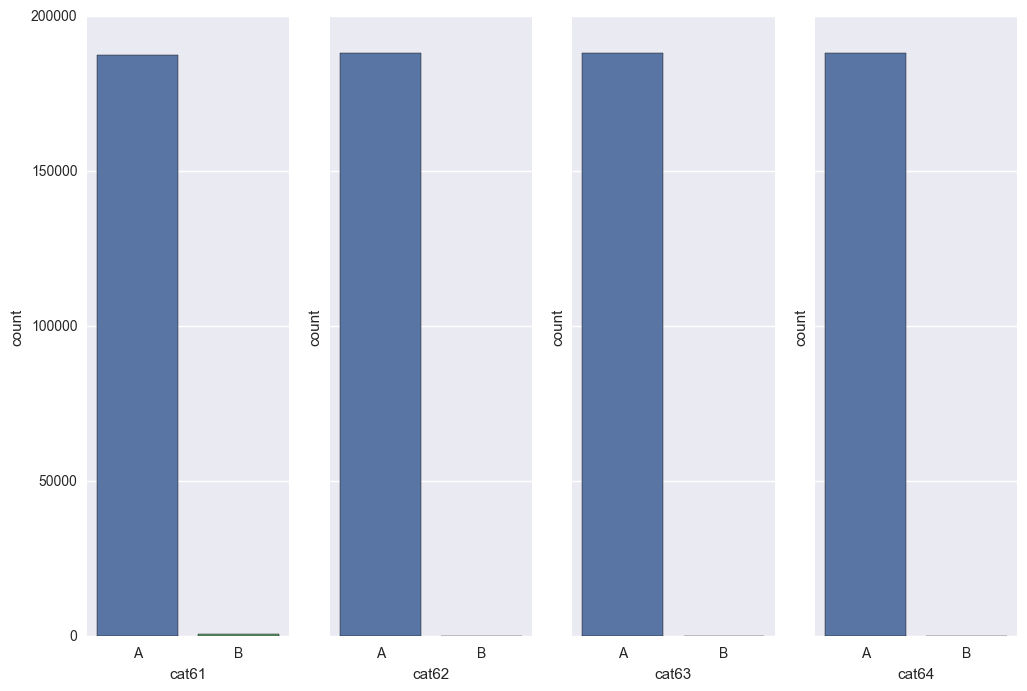

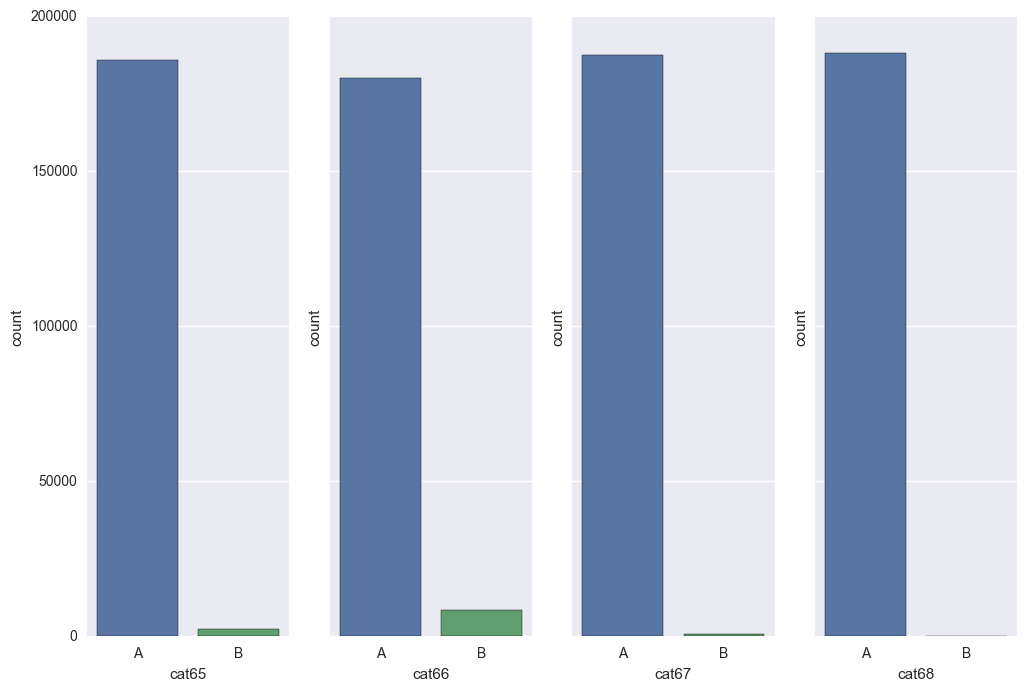

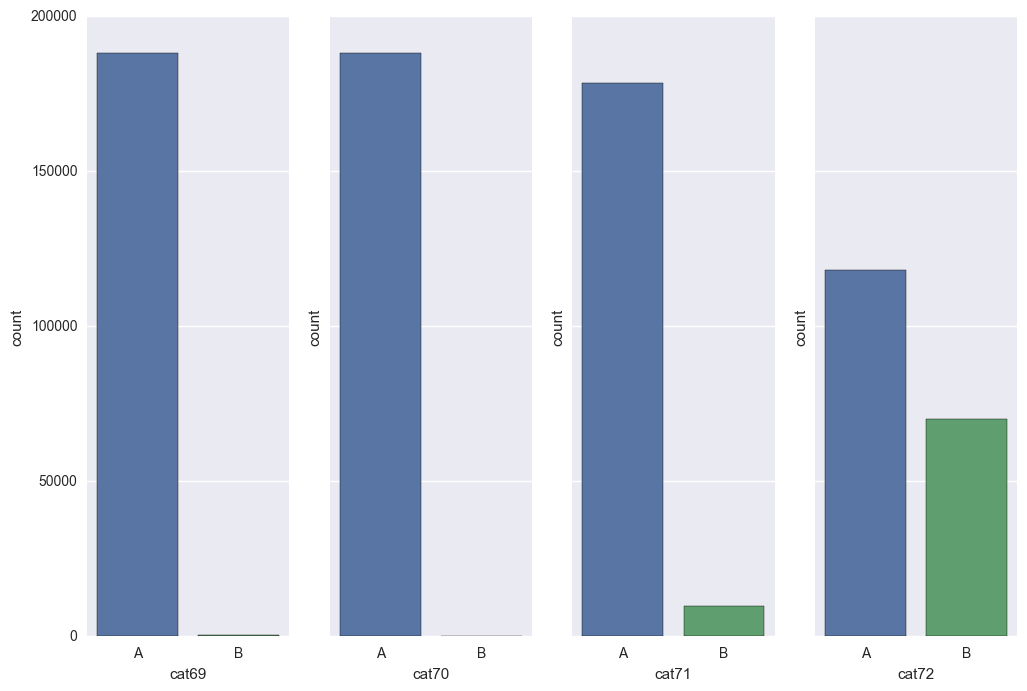

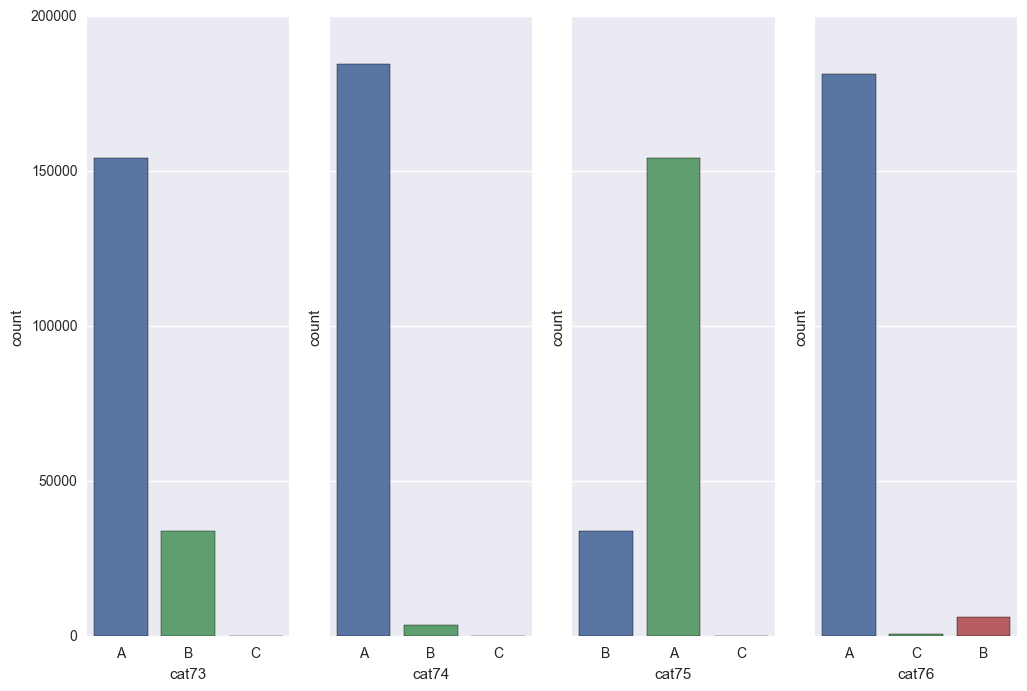

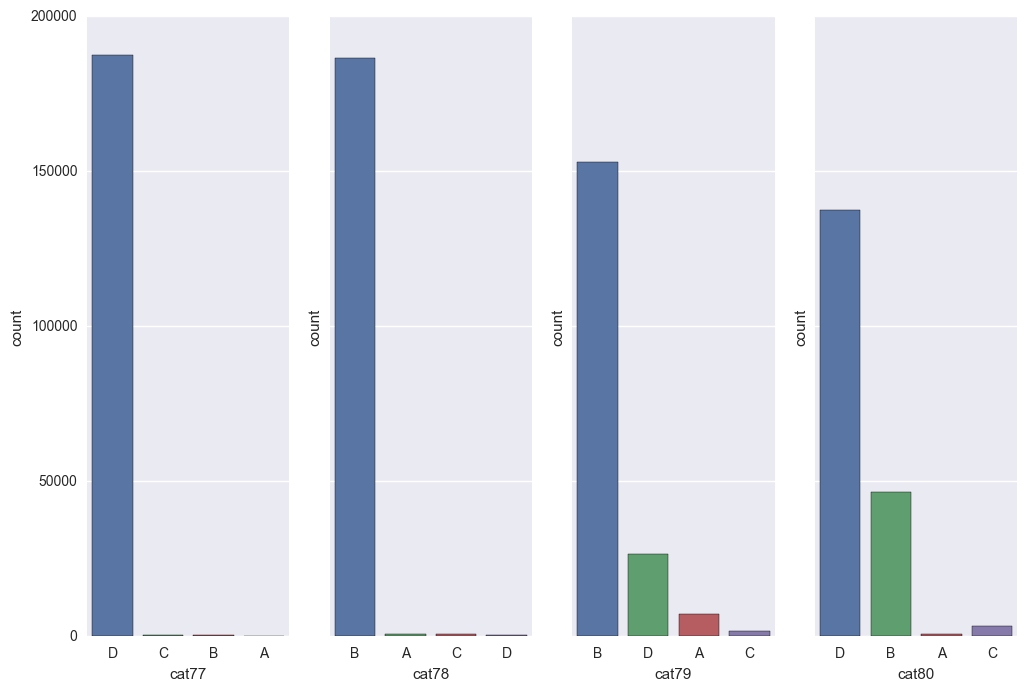

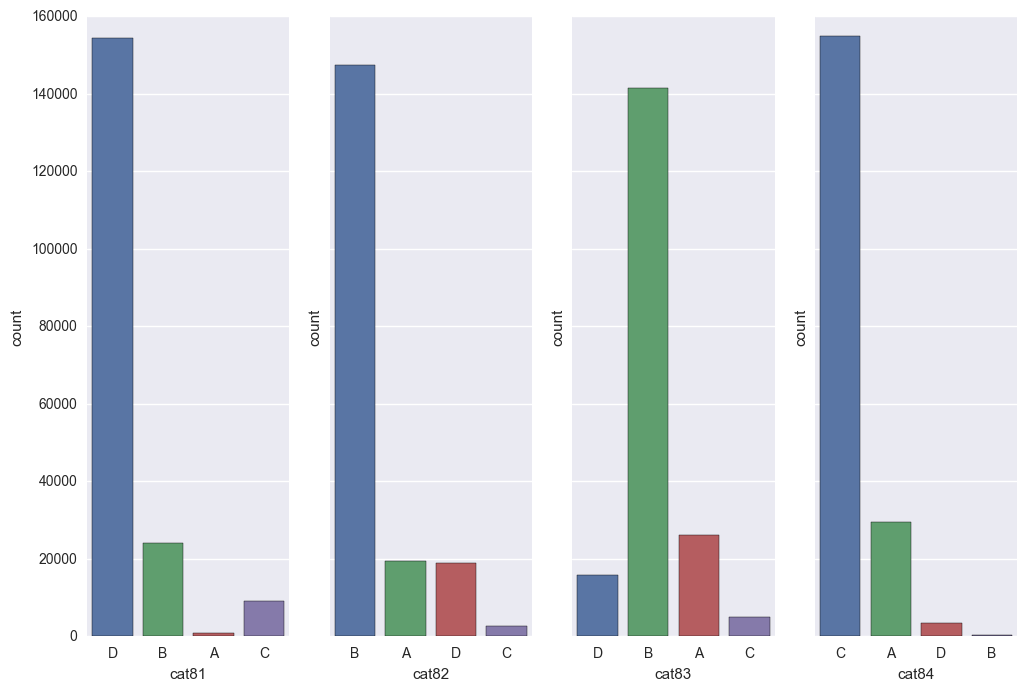

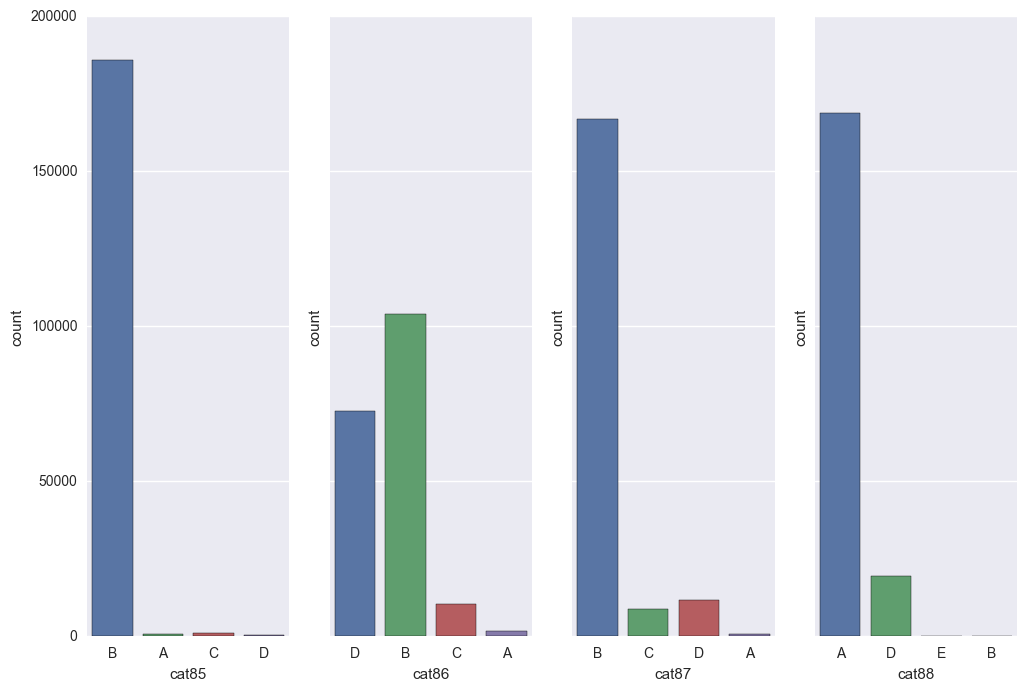

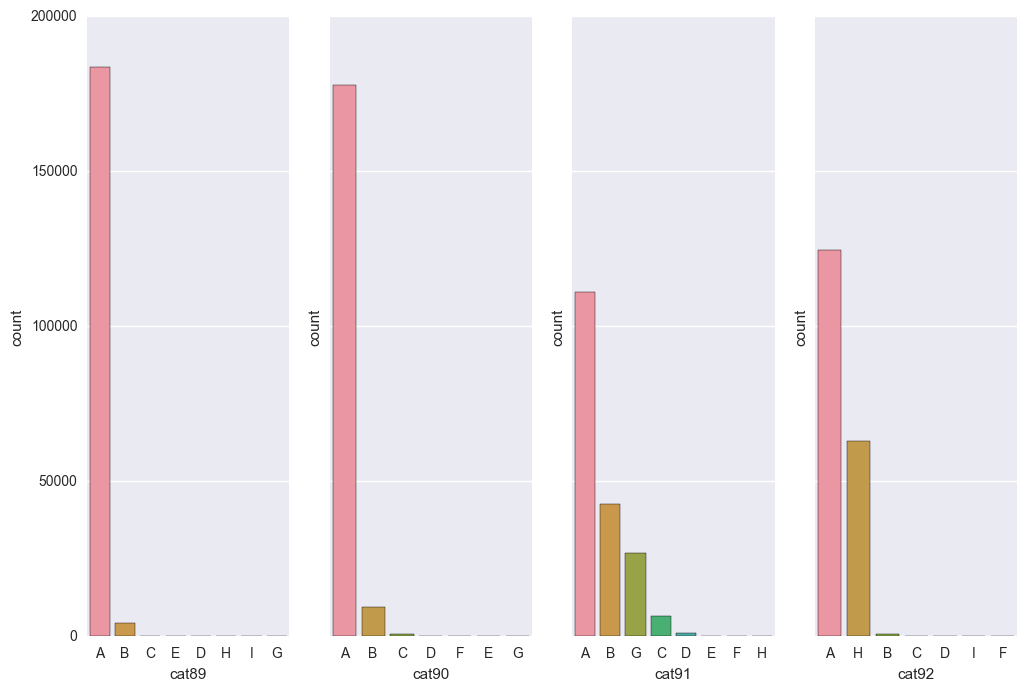

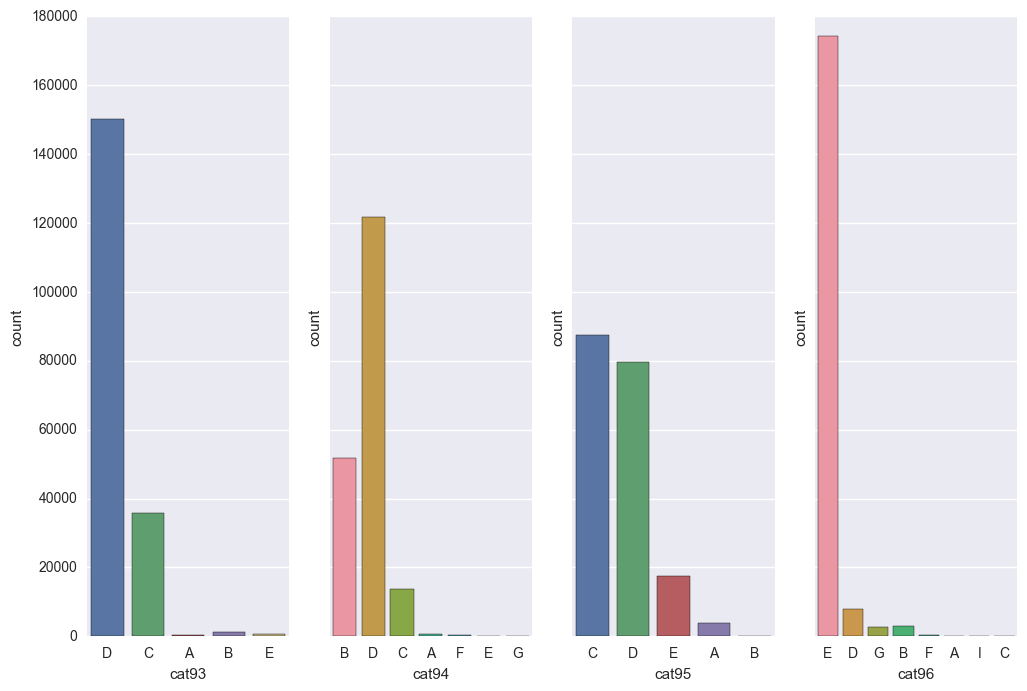

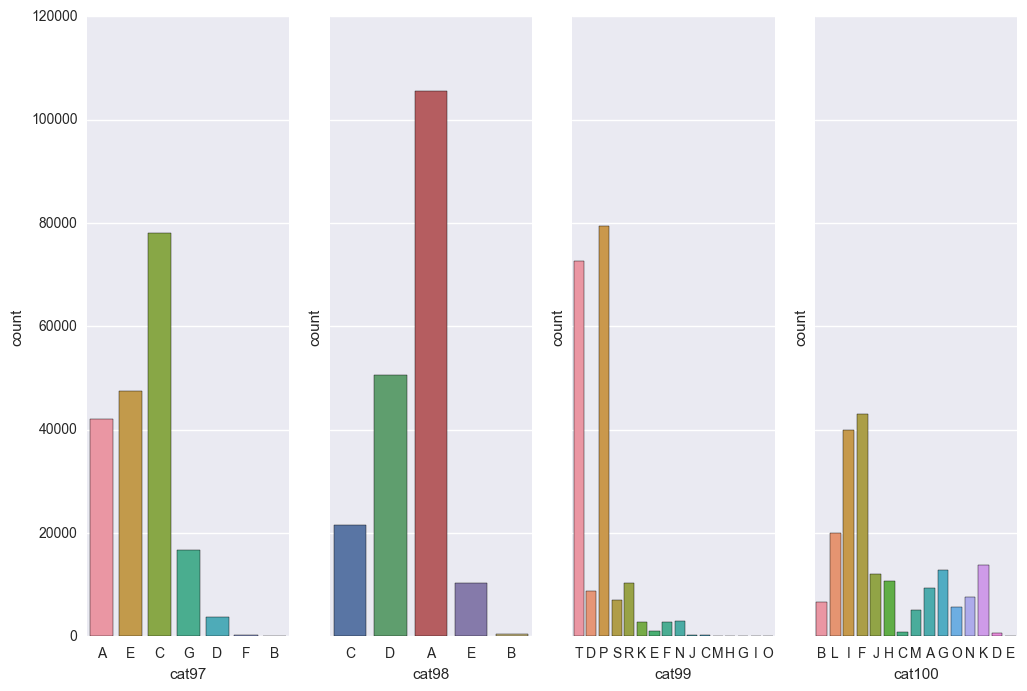

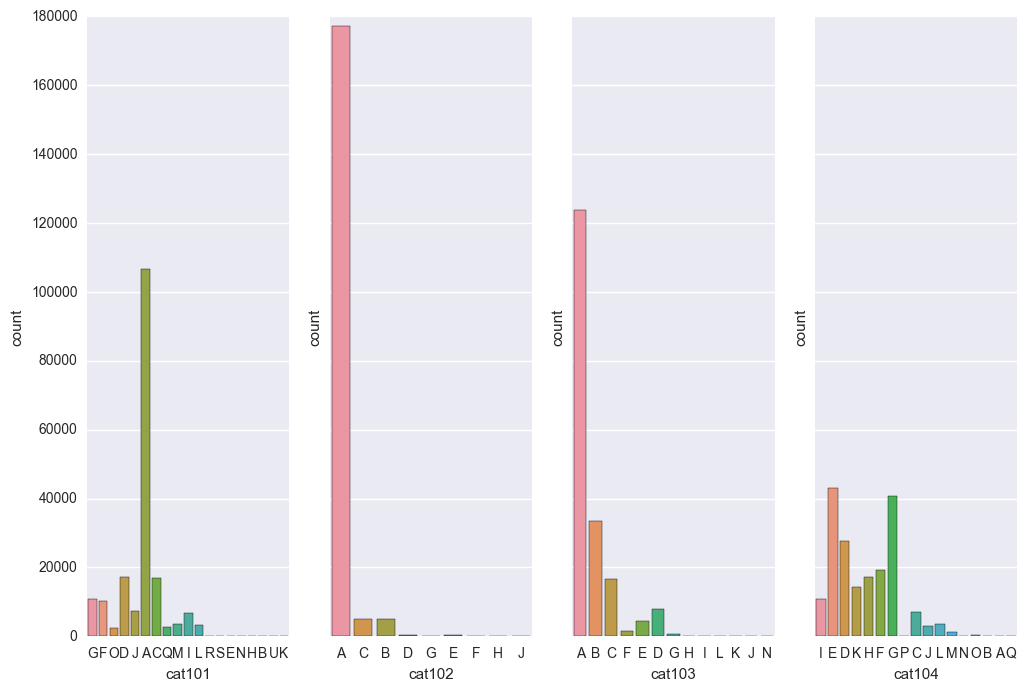

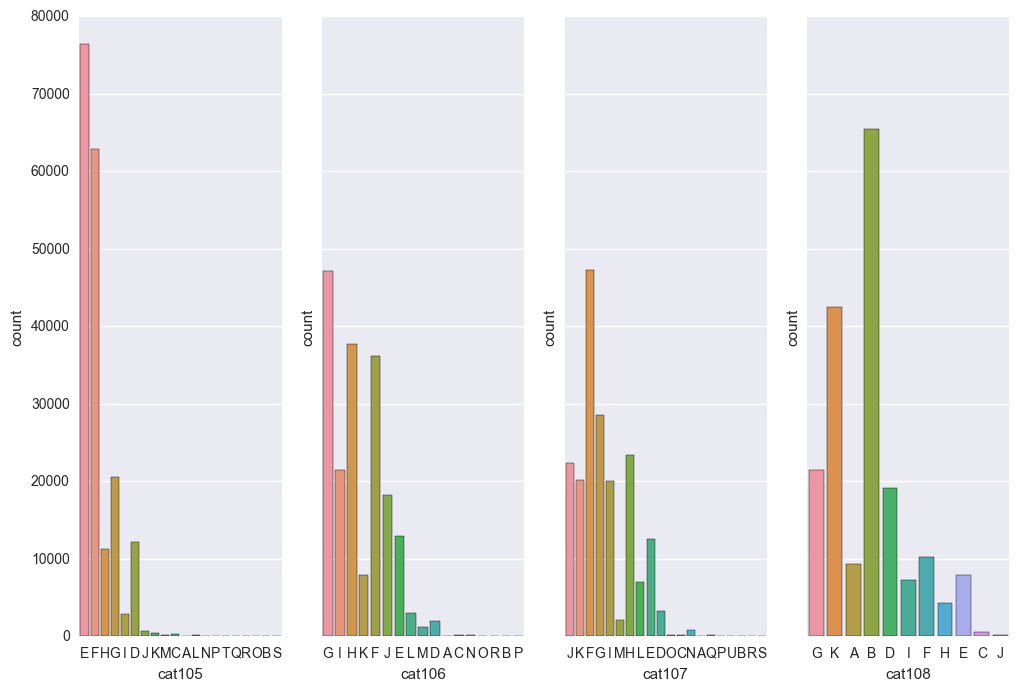

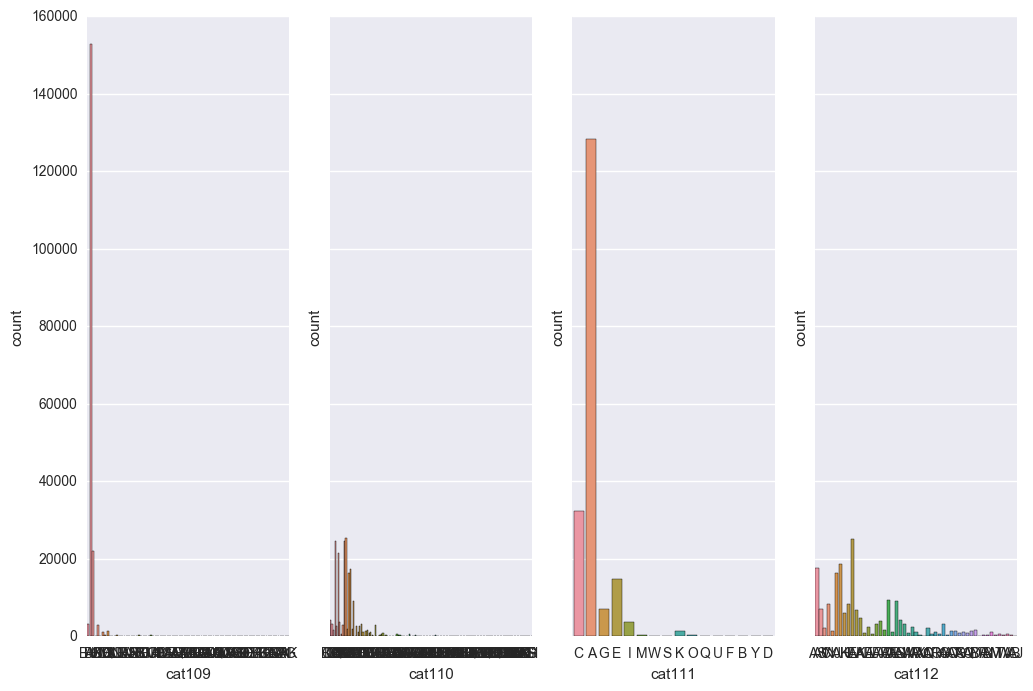

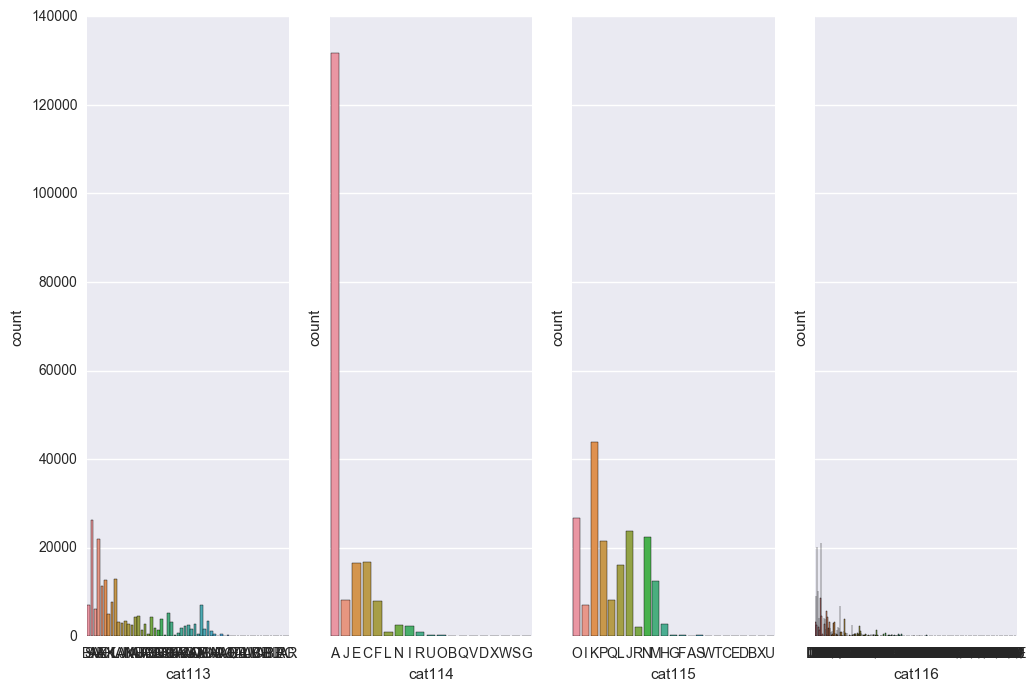

In [11]:
# Count of each label in each category

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cat_col[i*n_cols+j], data=train, ax=ax[j])

# 大部分都是2-3个类，个别比如最后一个有很多类。
# 共同问题，类的频率不均匀
#cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries
#cat73 to cat 108 have more than two labels
#cat109 to cat116 have many labels


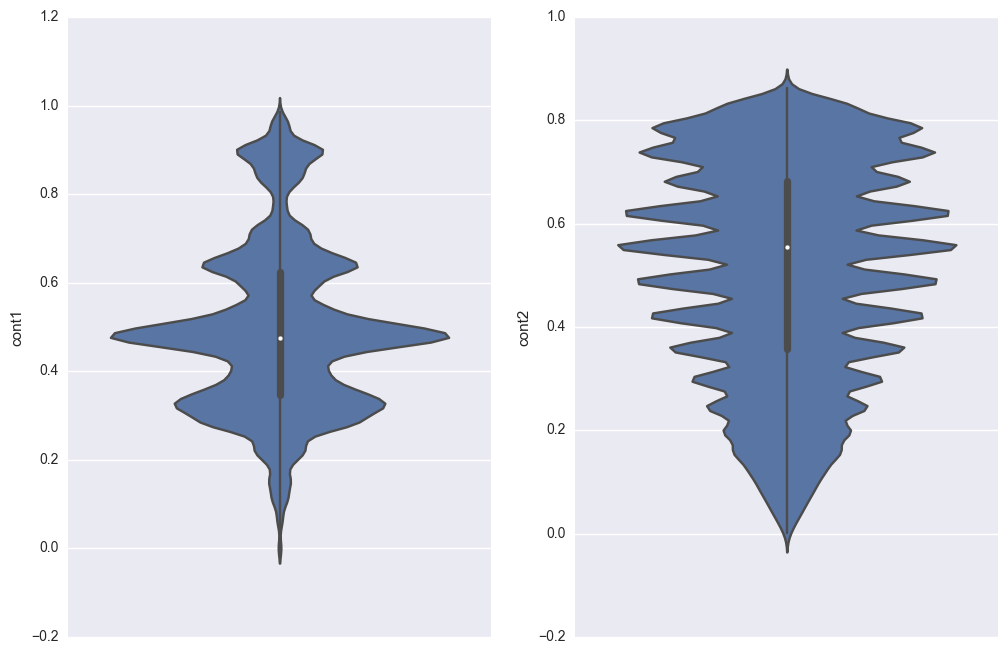

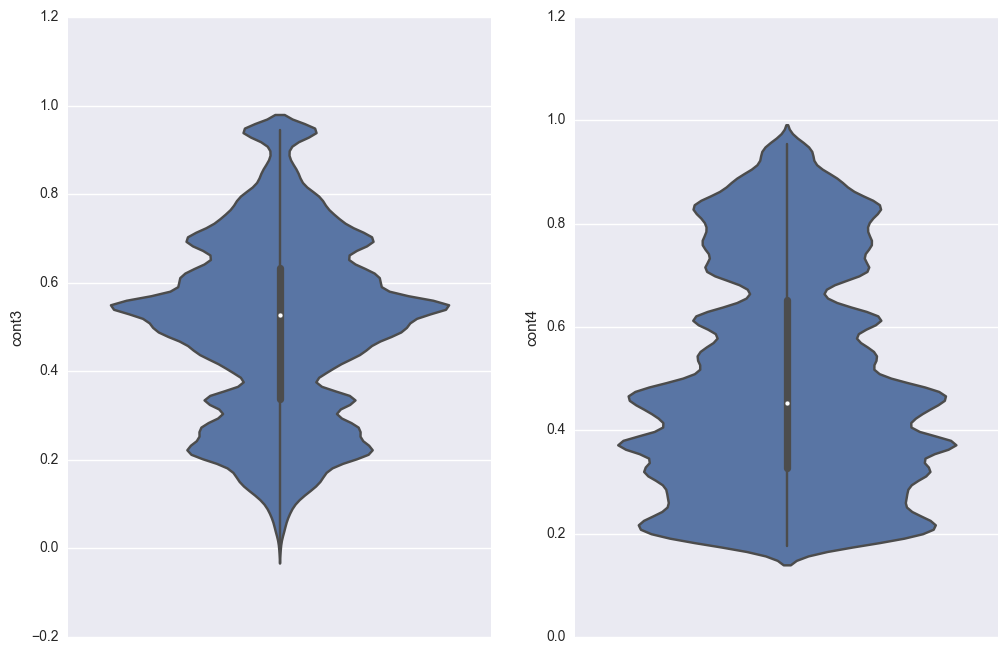

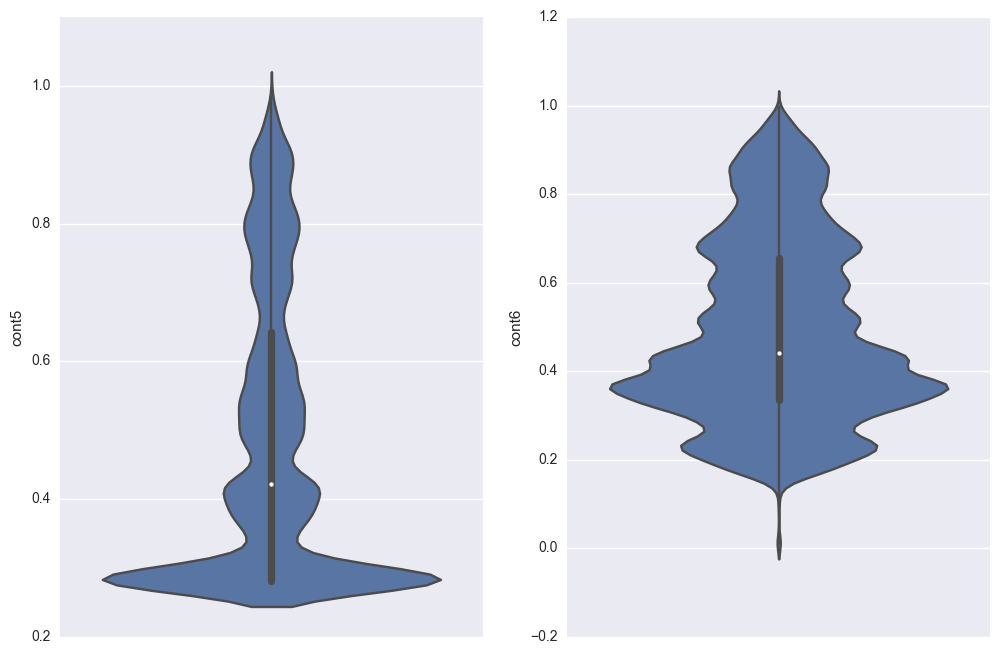

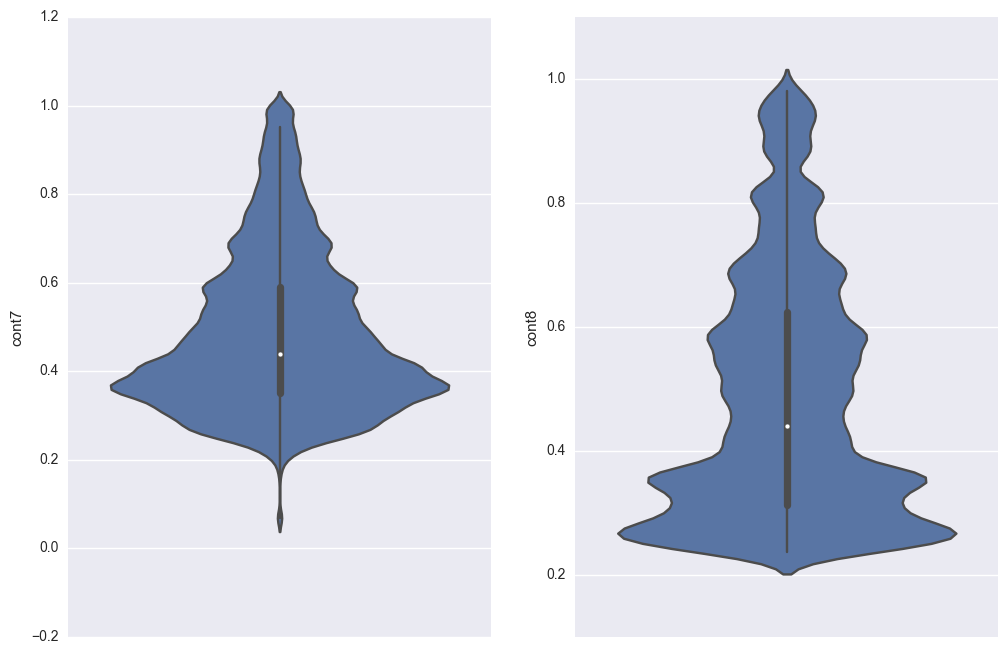

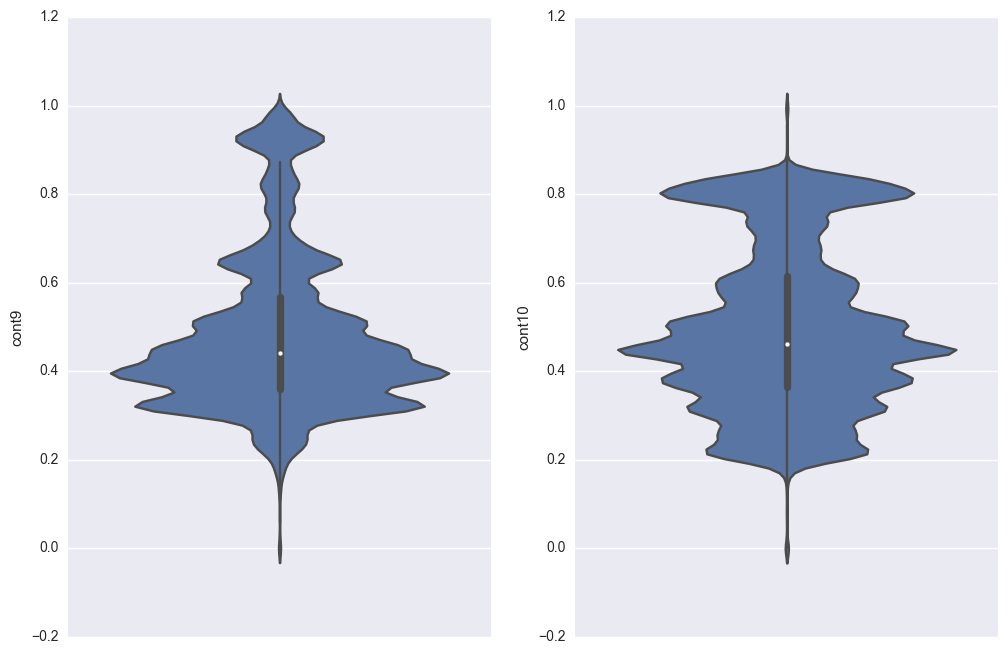

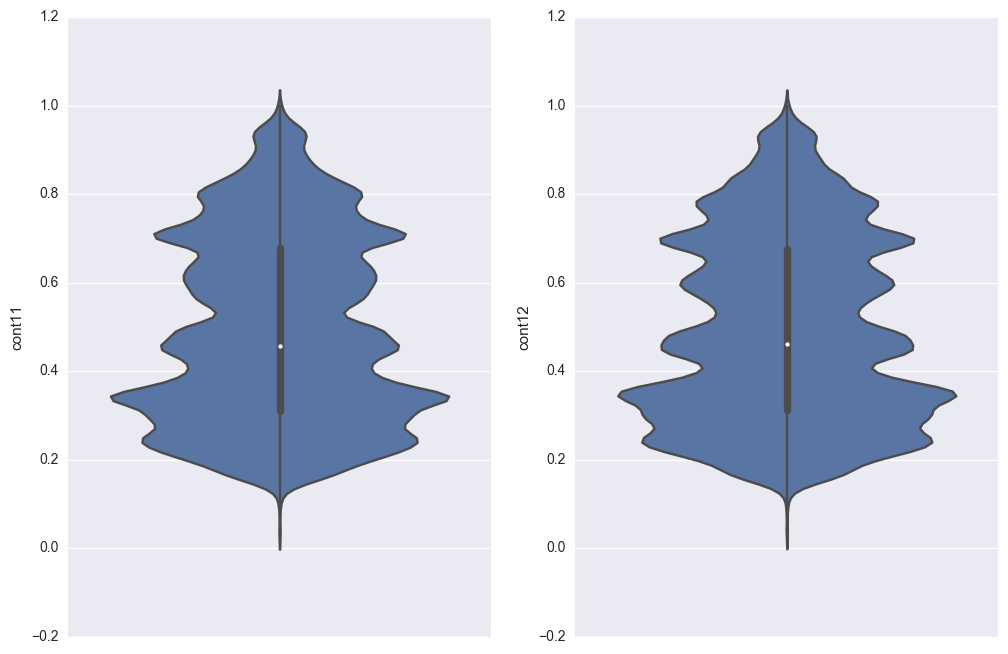

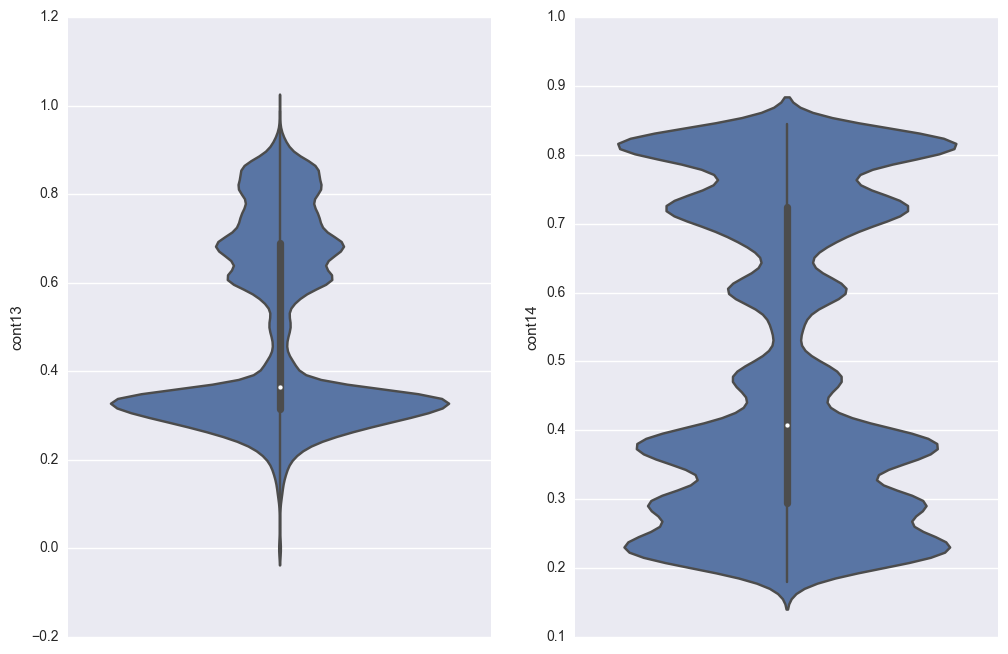

In [10]:
#Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=con_col[i*n_cols+j], data=train, ax=ax[j])

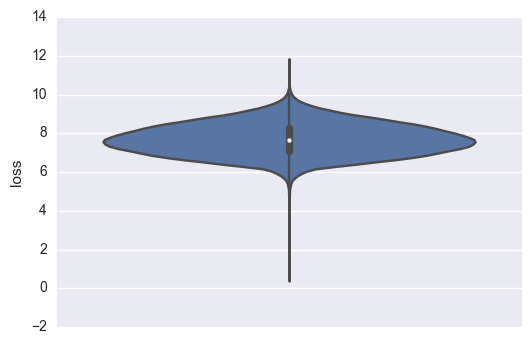

In [11]:
#log1p function applies log(1+x) to all elements of the column
loss = np.log1p(train["loss"])
#visualize the transformed column
sns.violinplot(data=train,y=loss)
#sns.violinplot(data=train,y=train["loss"])
plt.show()

#Plot shows that skew is corrected to a large extent
# 通过这个你就看到tranform的作用有多大
# 所以用到linear regression时候我们有必要对variables做一些处理：
# log transform; box cox; scale to (0,1)

### Label encoding & model training

### https://www.kaggle.com/c/allstate-claims-severity/forums/t/26447/faron-s-3rd-place-solution
### Some feature engineering instructions from 3rd place solution
### processing on categoricals:

#### one hot encoding
#### label encoding (in lexicographical order)
#### creation of interactions (up to 4-way)
#### target loss encoding
#### tf-idf encoding
#### XGB-embedding (leaf indices of single tree with depth >75 and min_child_weight > 100 used as feature for Neural Networks)
#### Keras-embedding via embedding layers
#### removal of rare values
#### count of values

### processing on numericals:

#### quantile-based binning
#### for NN: standard scaling, min-max scaling, Box-Cox transformation, percentile transformation
#### target loss encoding (except cont14)
#### count of values

### Used target transformations

#### y
#### log(y + n)
#### sqrt(y)
#### boxcox(y)
#### y => [0,1] (for logistic regression)

In [12]:
# jUST FOR YOUR REFERENCE

### https://www.kaggle.com/c/allstate-claims-severity/forums/t/26416/1st-place-solution
### Some models from 1st winner
#### Best Single Model:

#### My best single model is an XGBoost with the two-way interactions reported on the forum along with some chosen three, four, five and seven-way interactions. It score 1105.12 in the public LB with 10-fold CV around 1124. I chose the higher order interactions primarily based on mutual information. I used fair_obj with a constant of 0.7 for training that model and (1 + loss)**0.25 transformation reported by MrOijer.

#### My NN architecture

#### My best NN scores 1110 in the public leaderboard with a 10-fold cv of 1134.xx. It is very similar to the public scirpt scoring 1111.8x , just some more neurons in each layer. I used EarlyStopping, ModelCheckpoint and derived metric to monitor (I used log(loss + SHIFT) transformation) and 10-fold 10 times bagged model. Almost all my NN models follow the same architecture.

#### I used mostly the above two models to train a stacked model (details later in the post) in the second layer, but there are other models with significant contribution. Among them:

#### Regularized Greedy Forest I had three RGF mixed in to my ensemble trained with slighly different data and loss transformation. My best RGF scores 1113.xx with a cv around 1136.xx. It is a fantastic library that I explored back in BNP Paribas competiton and was determined to use it in one of my competitions. Just one setback is that it's a bit on the slower side being single-threaded.

#### LightGBM Another very fast and efficient gradient boosting library beside XGboost. I loved it. Best single model 1111.xx on public LB.

#### Vowpal Wabbit Always found it worth giving a shot and yes it beat random forest and extra trees which I never could get executed with MAE criterion in sklearn. Best single model 1133.xx with a cv of 1154.xx. I used quadtraic interactions in the categorical namespace.

#### LibFM Not much from single model, but definitely helped my ensemble. Best model 1166.xx with 10-fold cv of 1188.xx.

#### LibFFM Almost at par with my VW. Best model 10-fold cv 1158.xx with public LB 1139.xx.

#### I also used RF(R-h20), ExtraTrees(sklearn), glmnet (R) and some other models to diversify my final ensemble but none of them yielded significant individual performance.



In [ ]:
# 当然这里完全适用OHE
# OHE 比get dummies要快7倍，但OHE使用前需要先对features进项label encode

In [13]:
all_data = pd.concat((train, test), axis=0, ignore_index=True)
# AGAIN, 仅限kaggle competetion。
# 现实中new data 进来，encoder用.transform() instead of .fit_transform()

In [14]:
all_data.head()

,cat1,cat10,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,...,cont14,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,loss
0,A,A,B,G,A,A,I,E,G,J,...,0.714843,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,2213.18
1,A,B,L,F,A,A,E,E,I,K,...,0.304496,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,1283.60
2,A,B,L,O,A,B,E,F,H,F,...,0.774425,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,3005.09
3,B,A,I,D,A,A,E,E,I,K,...,0.602642,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,939.85
4,A,B,F,J,A,A,D,E,K,G,...,0.432606,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,2763.85


In [15]:
from sklearn import preprocessing
LBL = preprocessing.LabelEncoder()

for col in cat_col:
    LBL.fit_transform(all_data[col])
    
    # 如果你想看具体哪个value encode成了什么，请看上次作业答疑notebook
    all_data[col]=LBL.transform(all_data[col])

In [12]:
#OHE = preprocessing.OneHotEncoder(sparse=True)
#all_data_sparse=OHE.fit_transform(all_data[cat_col])

In [16]:
#all_data_sparse.shape
## it should be (313864, 1176) after OHE

In [17]:

import sklearn
from sklearn import grid_search, metrics

#scorer = metrics.make_scorer('ndcg_scorer', needs_proba=True) 
# 如果你要customize scorer

def search_model(train_x, train_y, est, param_grid, n_jobs, cv, refit=False):
##Grid Search for the best model
    model = grid_search.GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring = 'neg_mean_absolute_error',
                                     verbose  = 1,
                                     n_jobs  = n_jobs,
                                     iid    = True,
                                     refit    = refit,
                                     cv      = cv)
    # Fit Grid Search Model
    model.fit(train_x, train_y)
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:", model.best_params_)
    print("Scores:", model.grid_scores_)
    return model

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [18]:
train_y = all_data[:train.shape[0]]['loss']
train_x = all_data[:train.shape[0]].drop(['loss'], axis = 1)

In [19]:
#train_y = train_y.reshape(-1,1)
train_y = train_y.values
train_y = train_y.reshape(-1,1)

In [20]:
train_x.head()

,cat1,cat10,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,...,cont13,cont14,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9
0,0,0,1,6,0,0,8,4,6,9,...,0.822493,0.714843,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135
1,0,1,11,5,0,0,4,4,8,10,...,0.611431,0.304496,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127
2,0,1,11,14,0,1,4,5,7,5,...,0.195709,0.774425,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076
3,1,0,8,3,0,0,4,4,8,10,...,0.605077,0.602642,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128
4,0,1,5,9,0,0,3,4,10,6,...,0.246011,0.432606,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089


In [ ]:
# 相信xgboost有的同学已经在业余时间有所了解了。此处我们regression问题直接用default object: reg:linear
# 此处我们假设调完参数这个是最好的
# 感兴趣的同学看看这个， 里面有各个参数的意义和相互的关联
# 调参的时候也是从关联程度出发来成对调参的
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
import xgboost as xgb
param_grid = {
              'learning_rate':[0.02],
              'n_estimators':[1500],
              'max_depth': [9],
              'min_child_weight':[50],
              'subsample': [0.78],
              'colsample_bytree':[0.67],
              'gamma':[0.9],
              'nthread': [-1],
              'seed' : [1234]}

model = search_model(train_x,
                     train_y,
                     xgb.XGBRegressor(),
                     param_grid,
                     n_jobs = 1,
                     cv = 4,
                     refit = True)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] colsample_bytree=0.67, learning_rate=0.02, nthread=-1, min_child_weight=50, n_estimators=1500, subsample=0.78, seed=1234, max_depth=9, gamma=0.9 
[CV]  colsample_bytree=0.67, learning_rate=0.02, nthread=-1, min_child_weight=50, n_estimators=1500, subsample=0.78, seed=1234, max_depth=9, gamma=0.9, score=-1178.496027 -26.7min
[CV] colsample_bytree=0.67, learning_rate=0.02, nthread=-1, min_child_weight=50, n_estimators=1500, subsample=0.78, seed=1234, max_depth=9, gamma=0.9 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 26.7min remaining:    0.0s


In [ ]:
# 以上是没有对numerical feature做任何处理的
# 下面是对numerical data的常规预处理

In [18]:
from scipy.stats import skew, boxcox
skewed_cols = all_data[con_col].apply(lambda x: skew(x.dropna()))
print (skewed_cols.sort_values())

cont2    -0.311146
cont3    -0.007023
cont14    0.250673
cont11    0.281139
cont12    0.291997
cont10    0.352116
cont13    0.376138
cont4     0.417559
cont6     0.458413
cont1     0.513205
cont8     0.673237
cont5     0.679610
cont7     0.825889
cont9     1.067247
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1119d0350>]], dtype=object)

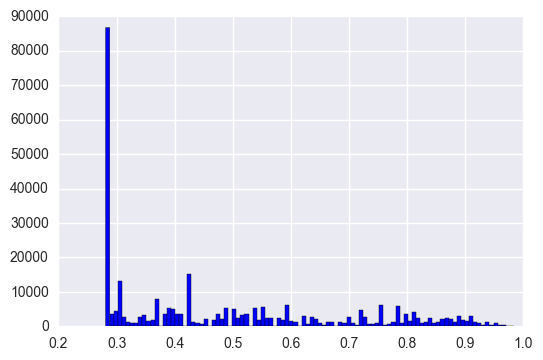

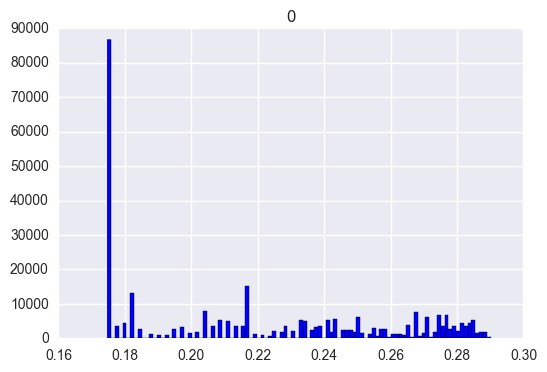

In [24]:
# apply box cox here
all_data.cont5.hist(color='b', bins=100)
cont5, lam = boxcox(all_data.cont5 + 1)
pd.DataFrame(cont5).hist(color='b', bins=100)


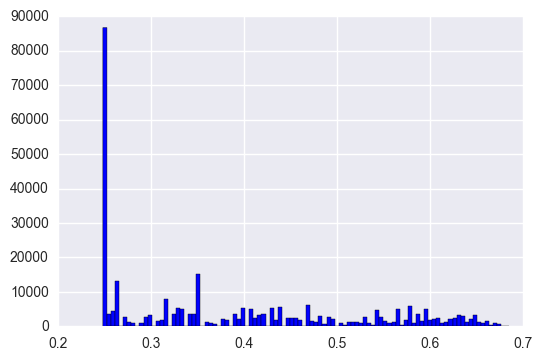

In [25]:
# 对比log transform
transformed = np.log1p(all_data.cont5)
transformed.hist(color='b', bins=100)

In [29]:
# box cox
skewed_cols = skewed_cols[(skewed_cols > 0.25) | (skewed_cols < -0.25)]
for skewed_col in skewed_cols:
    all_data[skewed_col], lam = boxcox(all_data[skewed_col] + 1)

In [ ]:
# standard scaling
SSL = preprocessing.StandardScaler()
for num_col in num_cols:
    all_data[num_col] = SSL.fit_transform(all_data[num_col])

In [36]:
train_x = all_data[:train.shape[0]].drop(['loss'], axis =1)
train_y = all_data[:train.shape[0]]['loss']

In [ ]:
import xgboost as xgb
param_grid = {
              'learning_rate':[0.02],
              'n_estimators':[1500],
              'max_depth': [9],
              'min_child_weight':[50],
              'subsample': [0.78],
              'colsample_bytree':[0.67],
              'gamma':[0.9],
              'nthread': [-1],
              'seed' : [1234]}

model = search_model(train_x,
                     train_y,
                     xgb.XGBRegressor(),
                     param_grid,
                     n_jobs = 1,
                     cv = 4,
                     refit = True)